In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import prepare
from matplotlib import style
style.use('ggplot')

Reading from csv...
Reading from csv...
Reading from csv...


**Exercises**
Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:


In [2]:
titanic = prepare.prep_titanic()
titanic.head(3)

,passenger_id,survived,pclass,sibsp,parch,fare,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,1,0,7.2500,1,0,1
1,1,1,1,1,0,71.2833,0,0,0
2,2,1,3,0,0,7.9250,0,0,1


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   passenger_id             891 non-null    int64  
 1   survived                 891 non-null    int64  
 2   pclass                   891 non-null    int64  
 3   sibsp                    891 non-null    int64  
 4   parch                    891 non-null    int64  
 5   fare                     891 non-null    float64
 6   sex_male                 891 non-null    uint8  
 7   embark_town_Queenstown   891 non-null    uint8  
 8   embark_town_Southampton  891 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 44.5 KB


In [4]:
# split the data set
train, test = train_test_split(titanic, test_size=.2, random_state=42, stratify=titanic.survived)
train, validate = train_test_split(train, test_size=.3, random_state=42, stratify=train.survived)

In [5]:
# into x and y
x_train = train.drop(columns=["survived"])
y_train = train.survived

x_validate = validate.drop(columns=["survived"])
y_validate = validate.survived

x_test = test.drop(columns=["survived"])
y_test = test.survived


*1.* What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.


In [6]:
#most common outcome is 0, 'did not survive
baseline = y_train.mode().values[0]
baseline


0

In [7]:
baseline_accuracy = (y_train == baseline).mean()
print( f'baseline_accuracy accuracy using mode is: {baseline_accuracy:.02f}')

baseline_accuracy accuracy using mode is: 0.62



*2.* Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)


In [8]:
model1 = DecisionTreeClassifier(max_depth=1, random_state= 42)

model1 = model1.fit(x_train,y_train)

model1_predictions = model1.predict(x_train)

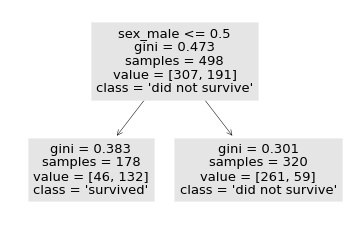

In [9]:
plot_tree(model1, feature_names=x_train.columns, class_names=["'did not survive'","'survived'"])
plt.show()


*3.* Evaluate your in-sample results using the model score, confusion matrix, and classification report.


In [10]:
model1.score(x_train,y_train)

0.7891566265060241

In [11]:
conf_matrix = pd.DataFrame(confusion_matrix(y_train, model1_predictions))
conf_matrix



,0,1
0,261,46
1,59,132


In [12]:
pd.DataFrame(classification_report(y_train, model1_predictions, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.815625,0.741573,0.789157,0.778599,0.787224
recall,0.850163,0.691099,0.789157,0.770631,0.789157
f1-score,0.832536,0.715447,0.789157,0.773992,0.787628
support,307.000000,191.000000,0.789157,498.000000,498.000000



*4.* Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.


In [13]:
# pull true positives and etc from confusion matrix
#positive case = not survived

tp = conf_matrix.loc[0,0]
fp = conf_matrix.loc[1,0]
fn = conf_matrix.loc[0,1]
tn = conf_matrix.loc[1,1]
all = tp + fp + tn + fn
tp, fp, fn, tn, all

(261, 59, 46, 132, 498)

In [14]:
def print_model_stats(matrix=conf_matrix):
    tp = conf_matrix.loc[0,0]
    fp = conf_matrix.loc[1,0]
    fn = conf_matrix.loc[0,1]
    tn = conf_matrix.loc[1,1]
    all = tp + fp + tn + fn
    # calc the requested stats
    accuracy = (tp+tn)/all
    print(f"Accuracy = {accuracy:.2f}")
    true_pos_rate = tp/(tp+fn)
    print(f"True Positive Rate = {true_pos_rate:.2f}")
    false_pos_rate = fp/(fp+tn)
    print(f"False Positive Rate = {false_pos_rate:.2f}")
    true_neg_rate = tn/(tn+fp)
    print(f"True Negative Rate = {true_neg_rate:.2f}")
    false_neg_rate = fn/(fn+tp)
    print(f"False Negative Rate = {false_neg_rate:.2f}")
    precision =(tp/(tp+fp))
    print(f"Precision = {precision:.2f}")
    recall =(tp/(tp+fn))
    print(f"Recall = {recall:.2f}")
    f1_score1 = 2*(precision*recall)/(precision+recall)
    print(f"F1 Score = {f1_score1:.2f}")
    support_pos =tp + fn
    print(f"Support (0) = {support_pos}")
    support_neg = fp + tn
    print(f"Support (1) = {support_neg}")


*5.* Run through steps 2-4 using a different max_depth value.


In [15]:
print('information for max_depth = 2')
model2 = DecisionTreeClassifier(max_depth=2, random_state= 42)
model2 = model2.fit(x_train,y_train)
model2_predictions = model2.predict(x_train)
print(f'score = {model2.score(x_train,y_train)}\n')
conf_matrix = pd.DataFrame(confusion_matrix(y_train, model2_predictions))
print(f'Confusion matrix: \n {conf_matrix}\n')
print(pd.DataFrame(classification_report(y_train, model2_predictions, output_dict=True)))
print_model_stats()

information for max_depth = 2
score = 0.7891566265060241

Confusion matrix: 
      0    1
0  261   46
1   59  132

                    0           1  accuracy   macro avg  weighted avg
precision    0.815625    0.741573  0.789157    0.778599      0.787224
recall       0.850163    0.691099  0.789157    0.770631      0.789157
f1-score     0.832536    0.715447  0.789157    0.773992      0.787628
support    307.000000  191.000000  0.789157  498.000000    498.000000
Accuracy = 0.79
True Positive Rate = 0.85
False Positive Rate = 0.31
True Negative Rate = 0.69
False Negative Rate = 0.15
Precision = 0.82
Recall = 0.85
F1 Score = 0.83
Support (0) = 307
Support (1) = 191


In [16]:
#try multiple depths
results = pd.DataFrame()

for i in range(1,21):
    #build
    model = DecisionTreeClassifier(max_depth=i,random_state=42)
    #fit
    model = model.fit(x_train, y_train)
    #eval
    train_accuracy = model.score(x_train,y_train)
    y_predictions = model.predict(x_train)
    train_f1_score = f1_score(y_train,model.predict(x_train),pos_label=0)
    validate_accuracy = model.score(x_validate,y_validate)
    validate_f1_score = f1_score(y_validate,model.predict(x_validate),pos_label=0)
    #build df
    stats = pd.Series({"max_depth": i,
        "train_accuracy": train_accuracy,
        "train_f1_score": train_f1_score,
        "validate_accuracy": validate_accuracy,
        "validate_f1_score": validate_f1_score})
    results = pd.concat([results,stats],axis =1)

results = results.T.reset_index(drop=True)
results

,max_depth,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score
0,1.0,0.789157,0.832536,0.789720,0.833948
1,2.0,0.789157,0.832536,0.789720,0.833948
2,3.0,0.811245,0.861357,0.827103,0.872852
3,4.0,0.833333,0.864157,0.780374,0.819923
4,5.0,0.855422,0.891239,0.789720,0.838710
5,6.0,0.885542,0.908507,0.766355,0.809160
6,7.0,0.905622,0.927132,0.785047,0.832117
7,8.0,0.929719,0.944000,0.752336,0.798479
8,9.0,0.945783,0.956661,0.757009,0.803030
9,10.0,0.961847,0.969502,0.757009,0.801527



*6.* Which model performs better on your in-sample data?


In [17]:
results.nlargest(1,'train_accuracy',keep ='all')

,max_depth,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score
12,13.0,1.0,1.0,0.724299,0.772201
13,14.0,1.0,1.0,0.724299,0.772201
14,15.0,1.0,1.0,0.724299,0.772201
15,16.0,1.0,1.0,0.724299,0.772201
16,17.0,1.0,1.0,0.724299,0.772201
17,18.0,1.0,1.0,0.724299,0.772201
18,19.0,1.0,1.0,0.724299,0.772201
19,20.0,1.0,1.0,0.724299,0.772201


In [18]:
results.nlargest(1,'train_f1_score',keep ='all')

,max_depth,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score
12,13.0,1.0,1.0,0.724299,0.772201
13,14.0,1.0,1.0,0.724299,0.772201
14,15.0,1.0,1.0,0.724299,0.772201
15,16.0,1.0,1.0,0.724299,0.772201
16,17.0,1.0,1.0,0.724299,0.772201
17,18.0,1.0,1.0,0.724299,0.772201
18,19.0,1.0,1.0,0.724299,0.772201
19,20.0,1.0,1.0,0.724299,0.772201



*7.* Which model performs best on your out-of-sample data, the validate set?


In [19]:
results.nlargest(1,'validate_accuracy',keep ='all')

,max_depth,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score
2,3.0,0.811245,0.861357,0.827103,0.872852


In [20]:
results.nlargest(1,'validate_f1_score',keep ='all')

,max_depth,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score
2,3.0,0.811245,0.861357,0.827103,0.872852



**Part II**

*1.* Work through these same exercises using the Telco dataset.


In [21]:
telco = prepare.prep_telco()
telco = telco.select_dtypes(exclude=['object'])
telco.head()


,is_female,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,monthly_charges,total_charges,churn,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,1,0,1,1,9,1,0,0,1,0,...,65.6,593.30,0,1,0,0,0,0,0,1
1,0,0,0,0,9,1,1,0,0,0,...,59.9,542.40,0,0,0,0,0,0,0,1
2,0,0,0,0,4,1,0,0,0,1,...,73.9,280.85,1,0,0,1,0,0,1,0
3,0,1,1,0,13,1,0,0,1,1,...,98.0,1237.85,1,0,0,1,0,0,1,0
4,1,1,1,0,3,1,0,0,0,0,...,83.9,267.40,1,0,0,1,0,0,0,1


In [22]:
# split the data set
train, test = train_test_split(telco, test_size=.2, random_state=42, stratify=telco.churn)
train, validate = train_test_split(train, test_size=.3, random_state=42, stratify=train.churn)

In [23]:
# into x and y
x_train = train.drop(columns=["churn"])
y_train = train.churn

x_validate = validate.drop(columns=["churn"])
y_validate = validate.churn

x_test = test.drop(columns=["churn"])
y_test = test.churn

In [24]:
y_train.value_counts()

0    2891
1    1046
Name: churn, dtype: int64

In [25]:
#most common outcome is 0, 'did not churn
baseline = y_train.mode().values[0]
baseline

0

In [26]:
baseline_accuracy = (y_train == baseline).mean()
print( f'baseline_accuracy accuracy using mode is: {baseline_accuracy:.02f}')

baseline_accuracy accuracy using mode is: 0.73


In [27]:
model1 = DecisionTreeClassifier(max_depth=3, random_state= 42)

model1 = model1.fit(x_train,y_train)

model1_predictions = model1.predict(x_train)

In [28]:
model1_predictions.mean()

0.1605283210566421

In [29]:
model1.score(x_train,y_train)

0.793243586487173

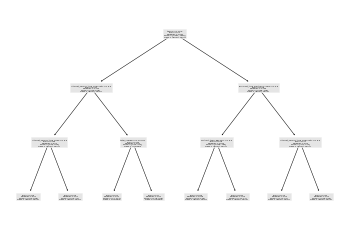

In [30]:
#plt.figure(figsize=(20,20))
plot_tree(model1, feature_names=x_train.columns, class_names=["'did not churn'","'churned'"])
plt.show()

In [31]:
conf_matrix = pd.DataFrame(confusion_matrix(y_train, model1_predictions))
conf_matrix

,0,1
0,2691,200
1,614,432


In [32]:
pd.DataFrame(classification_report(y_train, model1_predictions, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.814221,0.683544,0.793244,0.748883,0.779502
recall,0.930820,0.413002,0.793244,0.671911,0.793244
f1-score,0.868625,0.514899,0.793244,0.691762,0.774645
support,2891.000000,1046.000000,0.793244,3937.000000,3937.000000


In [33]:
tp = conf_matrix.loc[0,0]
fp = conf_matrix.loc[1,0]
fn = conf_matrix.loc[0,1]
tn = conf_matrix.loc[1,1]
all = tp + fp + tn + fn

In [34]:
#try multiple depths
results = pd.DataFrame()

for i in range(1,21):
    #build
    model = DecisionTreeClassifier(max_depth=i,random_state=42)
    #fit
    model = model.fit(x_train, y_train)
    #eval
    train_accuracy = model.score(x_train,y_train)
    y_predictions = model.predict(x_train)
    train_f1_score = f1_score(y_train,y_predictions ,pos_label=0)
    validate_accuracy = model.score(x_validate,y_validate)
    validate_f1_score = f1_score(y_validate,model.predict(x_validate),pos_label=0)
    #build df
    stats = pd.Series({"max_depth": i,
        "train_accuracy": train_accuracy,
        "train_f1_score": train_f1_score,
        "validate_accuracy": validate_accuracy,
        "validate_f1_score": validate_f1_score})
    results = pd.concat([results,stats],axis =1)

results = results.T.reset_index(drop=True)
results

,max_depth,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score
0,1.0,0.734315,0.846807,0.734005,0.846601
1,2.0,0.793244,0.868625,0.781398,0.862467
2,3.0,0.793244,0.868625,0.781398,0.862467
3,4.0,0.803150,0.865754,0.783175,0.854647
4,5.0,0.807722,0.874855,0.787322,0.863446
5,6.0,0.814072,0.877140,0.777844,0.855825
6,7.0,0.833122,0.887941,0.766588,0.844392
7,8.0,0.850648,0.902293,0.760664,0.844615
8,9.0,0.870206,0.913784,0.763033,0.844237
9,10.0,0.892304,0.927422,0.752370,0.834390


In [35]:
results.nlargest(1,'train_accuracy',keep ='all')

,max_depth,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score
19,20.0,0.996444,0.997583,0.729265,0.814454


In [36]:
results.nlargest(1,'train_f1_score',keep ='all')

,max_depth,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score
19,20.0,0.996444,0.997583,0.729265,0.814454


In [37]:
results.nlargest(1,'validate_accuracy',keep ='all')

,max_depth,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score
4,5.0,0.807722,0.874855,0.787322,0.863446


In [38]:
results.nlargest(1,'validate_f1_score',keep ='all')

,max_depth,train_accuracy,train_f1_score,validate_accuracy,validate_f1_score
4,5.0,0.807722,0.874855,0.787322,0.863446


*2.* Experiment with this model on other datasets with a higher number of output classes.

In [39]:
iris = prepare.prep_iris() 


In [40]:
iris['sepal_area'] = iris.sepal_length * iris.sepal_width
iris['petal_area'] = iris.petal_length * iris.petal_width
iris = iris.drop(columns=['species_versicolor','species_virginica'])
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,sepal_area,petal_area
0,5.1,3.5,1.4,0.2,setosa,17.85,0.28
1,4.9,3.0,1.4,0.2,setosa,14.70,0.28
2,4.7,3.2,1.3,0.2,setosa,15.04,0.26


In [41]:
# split the data set
train, test = train_test_split(iris, test_size=.2, random_state=123, stratify=iris.species)
train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train.species)

In [42]:
# into x and y
x_train = train.drop(columns=["species"])
y_train = train.species

x_validate = validate.drop(columns=["species"])
y_validate = validate.species

x_test = test.drop(columns=["species"])
y_test = test.species

In [43]:
#most common outcome is 0, 'did not survive
baseline = y_train.mode().values[0]
baseline

'setosa'

In [44]:
baseline_accuracy = (y_train == baseline).mean()
print( f'baseline_accuracy accuracy using mode is: {baseline_accuracy:.03f}')

baseline_accuracy accuracy using mode is: 0.333


In [45]:
model1 = DecisionTreeClassifier(max_depth=2, random_state= 42)

model1 = model1.fit(x_train,y_train)

model1_predictions = model1.predict(x_train)

In [46]:
pd.DataFrame(model1_predictions).value_counts()

virginica     30
setosa        28
versicolor    26
dtype: int64

In [47]:
model1.score(x_train,y_train)

0.9761904761904762

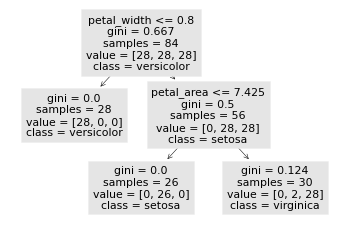

In [48]:
#plt.figure(figsize=(20,20))
plot_tree(model1, feature_names=x_train.columns, class_names=y_train.unique())
plt.show()

In [49]:
conf_matrix = pd.DataFrame(confusion_matrix(y_train, model1_predictions))
conf_matrix

,0,1,2
0,28,0,0
1,0,26,2
2,0,0,28


In [50]:
pd.DataFrame(classification_report(y_train, model1_predictions, output_dict=True))

,setosa,versicolor,virginica,accuracy,macro avg,weighted avg
precision,1.0,1.000000,0.933333,0.97619,0.977778,0.977778
recall,1.0,0.928571,1.000000,0.97619,0.976190,0.976190
f1-score,1.0,0.962963,0.965517,0.97619,0.976160,0.976160
support,28.0,28.000000,28.000000,0.97619,84.000000,84.000000


In [51]:
#try multiple depths
results = pd.DataFrame()

for i in range(1,21):
    #build
    model = DecisionTreeClassifier(max_depth=i,random_state=42)
    #fit
    model = model.fit(x_train, y_train)
    #eval
    train_accuracy = model.score(x_train,y_train)
    y_predictions = model.predict(x_train)
    validate_accuracy = model.score(x_validate,y_validate)
    #build df
    stats = pd.Series({"max_depth": i,
        "train_accuracy": train_accuracy,
        "validate_accuracy": validate_accuracy})
    results = pd.concat([results,stats],axis =1)

results = results.T.reset_index(drop=True)
results

,max_depth,train_accuracy,validate_accuracy
0,1.0,0.666667,0.666667
1,2.0,0.976190,1.000000
2,3.0,0.976190,1.000000
3,4.0,0.988095,0.944444
4,5.0,1.000000,0.972222
5,6.0,1.000000,0.972222
6,7.0,1.000000,0.972222
7,8.0,1.000000,0.972222
8,9.0,1.000000,0.972222
9,10.0,1.000000,0.972222


In [52]:
results.nlargest(1,'train_accuracy',keep ='all')

,max_depth,train_accuracy,validate_accuracy
4,5.0,1.0,0.972222
5,6.0,1.0,0.972222
6,7.0,1.0,0.972222
7,8.0,1.0,0.972222
8,9.0,1.0,0.972222
9,10.0,1.0,0.972222
10,11.0,1.0,0.972222
11,12.0,1.0,0.972222
12,13.0,1.0,0.972222
13,14.0,1.0,0.972222


In [53]:
results.nlargest(1,'validate_accuracy',keep ='all')

,max_depth,train_accuracy,validate_accuracy
1,2.0,0.97619,1.0
2,3.0,0.97619,1.0


** Random Forest Exercises**
Continue working in your model file with titanic data to do the following:



In [54]:
# split the data set
train, test = train_test_split(titanic, test_size=.2, random_state=42, stratify=titanic.survived)
train, validate = train_test_split(train, test_size=.3, random_state=42, stratify=train.survived)
# into x and y
x_train = train.drop(columns=["survived"])
y_train = train.survived
x_validate = validate.drop(columns=["survived"])
y_validate = validate.survived
x_test = test.drop(columns=["survived"])
y_test = test.survived

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.



In [55]:
rf = RandomForestClassifier(random_state=42, min_samples_leaf= 1, max_depth=10)
rf.fit(x_train,y_train)
print(rf.feature_importances_)


[0.24454228 0.09906964 0.05103513 0.0554556  0.23111755 0.27308069
 0.01329316 0.03240595]


In [56]:
y_pred = rf.predict(x_train)


2. Evaluate your results using the model score, confusion matrix, and classification report.



In [57]:
rf.score(x_train,y_train)

0.9618473895582329

In [58]:
conf_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred))
conf_matrix

,0,1
0,305,2
1,17,174


In [59]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.947205,0.988636,0.961847,0.967921,0.963095
recall,0.993485,0.910995,0.961847,0.952240,0.961847
f1-score,0.969793,0.948229,0.961847,0.959011,0.961523
support,307.000000,191.000000,0.961847,498.000000,498.000000


3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [60]:
print_model_stats()

Accuracy = 0.96
True Positive Rate = 0.99
False Positive Rate = 0.09
True Negative Rate = 0.91
False Negative Rate = 0.01
Precision = 0.95
Recall = 0.99
F1 Score = 0.97
Support (0) = 307
Support (1) = 191


4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.



In [61]:
#try multiple depths
results = pd.DataFrame()
for depth in range(0,10):
    for min_samples in range(1,11):
        #build
        model = RandomForestClassifier(random_state=42, min_samples_leaf= min_samples, max_depth=10-depth)
        #fit
        model = model.fit(x_train, y_train)
        #eval
        train_accuracy = model.score(x_train,y_train)
        validate_accuracy = model.score(x_validate,y_validate)
        #build df
        stats = pd.Series({"max_depth": 10-depth,
            "min_samples_leaf": min_samples,
            "train_accuracy": train_accuracy,
            "validate_accuracy": validate_accuracy,
            "difference": abs(train_accuracy-validate_accuracy)})
        results = pd.concat([results,stats],axis =1)


results = results.T.reset_index(drop=True)
results

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
0,10.0,1.0,0.961847,0.803738,0.158109
1,10.0,2.0,0.909639,0.822430,0.087209
2,10.0,3.0,0.887550,0.813084,0.074466
3,10.0,4.0,0.875502,0.813084,0.062418
4,10.0,5.0,0.863454,0.794393,0.069061
...,...,...,...,...,...
95,1.0,6.0,0.722892,0.728972,0.006080
96,1.0,7.0,0.722892,0.728972,0.006080
97,1.0,8.0,0.722892,0.728972,0.006080
98,1.0,9.0,0.722892,0.728972,0.006080


5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



In [62]:
# this one persomes best in sample data because it can over fit due to the min sample per left being 1
results.nlargest(1,'train_accuracy',keep ='all')

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
0,10.0,1.0,0.961847,0.803738,0.158109


In [63]:
results.nlargest(1,'validate_accuracy',keep ='all')

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
1,10.0,2.0,0.909639,0.82243,0.087209
56,5.0,7.0,0.833333,0.82243,0.010903


6. After making a few models, which one has the best performance (or closest metrics) on both train and validate?

In [64]:
results.nsmallest(1,'difference',keep ='all')

,max_depth,min_samples_leaf,train_accuracy,validate_accuracy,difference
78,3.0,9.0,0.809237,0.808411,0.000826


**KNN Exercises**
Continue working in your model file with the titanic dataset.



1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)



In [92]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_train)



2. Evaluate your results using the model score, confusion matrix, and classification report.



In [66]:
knn.score(x_train,y_train)

0.7389558232931727

In [67]:
conf_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred))
conf_matrix

,0,1
0,268,39
1,91,100


In [68]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.746518,0.719424,0.738956,0.732971,0.736127
recall,0.872964,0.523560,0.738956,0.698262,0.738956
f1-score,0.804805,0.606061,0.738956,0.705433,0.728580
support,307.000000,191.000000,0.738956,498.000000,498.000000


3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [69]:
print_model_stats()

Accuracy = 0.74
True Positive Rate = 0.87
False Positive Rate = 0.48
True Negative Rate = 0.52
False Negative Rate = 0.13
Precision = 0.75
Recall = 0.87
F1 Score = 0.80
Support (0) = 307
Support (1) = 191


4. Run through steps 2-4 setting k to 10



In [93]:
knn10 = KNeighborsClassifier(n_neighbors=10)
knn10.fit(x_train, y_train)
y_pred = knn10.predict(x_train)
print(f' model score = {knn10.score(x_train,y_train)}')
conf_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred))
print(f'confusion matrix\n{conf_matrix}')
print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)))
print_model_stats()

 model score = 0.7028112449799196
confusion matrix
     0   1
0  292  15
1  133  58
                    0           1  accuracy   macro avg  weighted avg
precision    0.687059    0.794521  0.702811    0.740790      0.728274
recall       0.951140    0.303665  0.702811    0.627402      0.702811
f1-score     0.797814    0.439394  0.702811    0.618604      0.660348
support    307.000000  191.000000  0.702811  498.000000    498.000000
Accuracy = 0.70
True Positive Rate = 0.95
False Positive Rate = 0.70
True Negative Rate = 0.30
False Negative Rate = 0.05
Precision = 0.69
Recall = 0.95
F1 Score = 0.80
Support (0) = 307
Support (1) = 191


5. Run through setps 2-4 setting k to 20



In [94]:
knn20 = KNeighborsClassifier(n_neighbors=20)
knn20.fit(x_train, y_train)
y_pred = knn20.predict(x_train)
print(f' model score = {knn20.score(x_train,y_train)}')
conf_matrix = pd.DataFrame(confusion_matrix(y_train, y_pred))
print(f'confusion matrix\n{conf_matrix}')
print(pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)))
print_model_stats()

 model score = 0.6947791164658634
confusion matrix
     0   1
0  298   9
1  143  48
                    0           1  accuracy   macro avg  weighted avg
precision    0.675737    0.842105  0.694779    0.758921      0.739545
recall       0.970684    0.251309  0.694779    0.610996      0.694779
f1-score     0.796791    0.387097  0.694779    0.591944      0.639660
support    307.000000  191.000000  0.694779  498.000000    498.000000
Accuracy = 0.69
True Positive Rate = 0.97
False Positive Rate = 0.75
True Negative Rate = 0.25
False Negative Rate = 0.03
Precision = 0.68
Recall = 0.97
F1 Score = 0.80
Support (0) = 307
Support (1) = 191


6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?



In [ ]:
# The orginal works the best because it uses its closest neighbors, however the more neighbors increases TPR/recall
#  which could be good in specific use cases

7. Which model performs best on our out-of-sample data from validate?

In [95]:
# knn with 20 works best on validate in both accuracy and recall
print(f'knn model score = {knn.score(x_validate,y_validate)}')
y_pred = knn.predict(x_validate)
print(f'Recall = {pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True)).T.recall[0]}')
print(f'knn10 model score = {knn10.score(x_validate,y_validate)}')
y_pred = knn10.predict(x_validate)
print(f'Recall = {pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True)).T.recall[0]}')
print(f'knn20 model score = {knn20.score(x_validate,y_validate)}')
y_pred = knn20.predict(x_validate)
print(f'Recall = {pd.DataFrame(classification_report(y_validate, y_pred, output_dict=True)).T.recall[0]}')

knn model score = 0.6261682242990654
Recall = 0.7878787878787878
knn10 model score = 0.677570093457944
Recall = 0.9242424242424242
knn20 model score = 0.6822429906542056
Recall = 0.9545454545454546
